# Step 1: Understand the Segmentation Data

In [1]:
import pandas as pd
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


1. InvoiceNo: The unique identifier of each customer invoice.
2. StockCode: The unique identifier of each item in stock.
3. Description: The item purchased by the customer.
4. Quantity: The number of each item purchased by a customer in a single invoice.
5. InvoiceDate: The purchase date.
6. UnitPrice: Price of one unit of each item.
7. CustomerID: Unique identifier assigned to each user.
8. Country: The country from where the purchase was made.

Need to build different customer segments based on each user’s purchase behavior.

## Step 2: Preprocessing Data for Segmentation

The informative features: "Quantity", "InvoiceDate", and "UnitPrice"
    
Derive a customer's RFM profile - Recency, Frequency, Monetary Value

1. Recency: How recently have they made a purchase?
2. Frequency: How often have they bought something?
3. Monetary Value: How much money do they spend on average when making purchases?

## Recency

In [7]:
# convert data column to datetime format
df['Date'] = pd.to_datetime(df['InvoiceDate'])
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID', 'Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [12]:
# assign a recency score to each customerID
df_rec = df_rec.copy()
df_rec.loc[:, 'recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

In [13]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1,373
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1,373


: The dataframe has a new column called 'recency' that addresses when each customer last bought something from the platform.

## Frequency

In [15]:
# create a new dataframe with two columns, "CustomerID" and "frequency"
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [16]:
# merge new dataframe above with the previous one
rec_freq = df_freq.merge(df_rec,on='CustomerID')

In [17]:
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


## Monetary Value

In [18]:
# calculate each user's monetary value to understand the total amount of money 
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [19]:
# merge this dataframe with the main dataframe
rfm = m.merge(rec_freq, on = 'CustomerID')

In [20]:
# select only the columns: 'CustomerID', 'recency', 'frequency', 'monetary_value'
finaldf = rfm[['CustomerID', 'recency', 'frequency', 'monetary_value']]

## Removing Outliers

recency: 


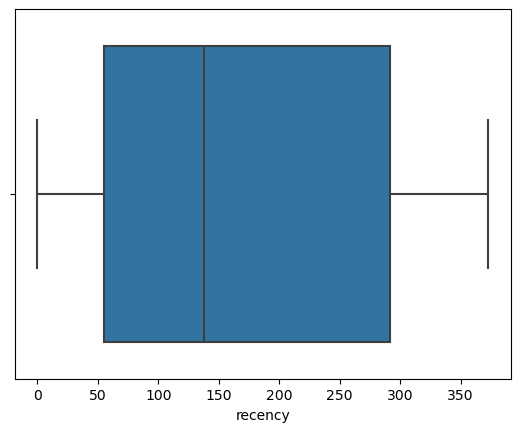

frequency: 


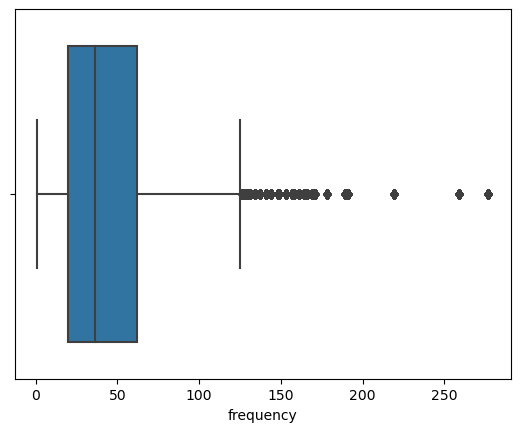

monetary_value: 


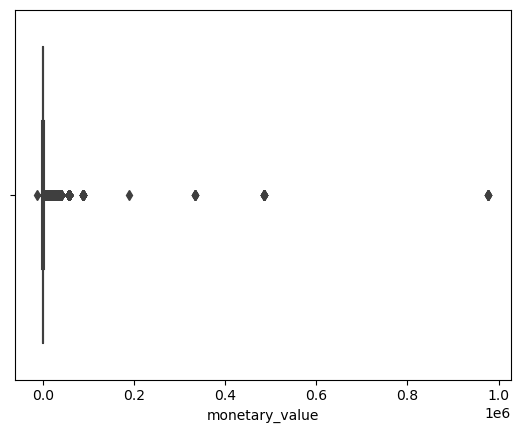

In [22]:
# boxplot of each variable to check outliers
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

: "recency" is the only variable without visible outliers. 
Outliers from other two variables must me removed. Next, I will use a measurement called a Z-score.

In [34]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

## Standardization

In [35]:
# make dataset follow a normal distribution
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [36]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294


# Step 3: Building The Customer Segmentation Model

Text(0, 0.5, 'Inertia')

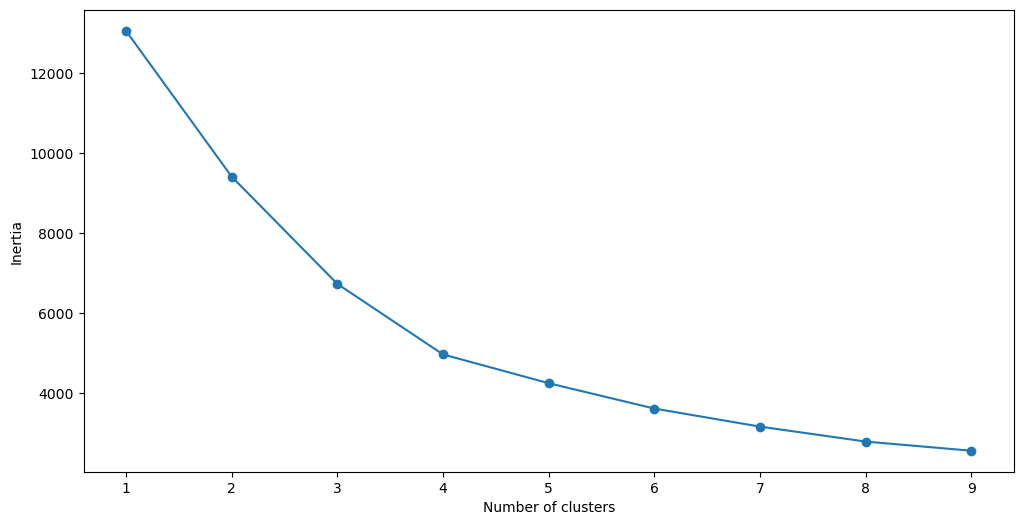

In [37]:
# Create a loop and run the K-Means algorithm from 1 to 10 clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

: The 'elbow' of this graph = point of inflection on the curve (at the 4-cluster mark)

In [39]:
# optimal number of clusters in K-Means algorithm = 4
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [40]:
# use silhouette score to evaluate the performance of the model 
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4360722849503388


: The silhouette coefficient of this model is 0.44. Thus, it is a reasonable cluster separation.

# Step 5: Segmentation Model Interpretation and Visualization

In [42]:
# assign clusters to each customer in the dataset:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [44]:
frame.head()

,recency,frequency,monetary_value,cluster
1,6,31,1246.73,0
32,15,17,4311.90,0
49,355,73,1618.81,3
122,63,17,553.25,0
139,77,15,947.61,0


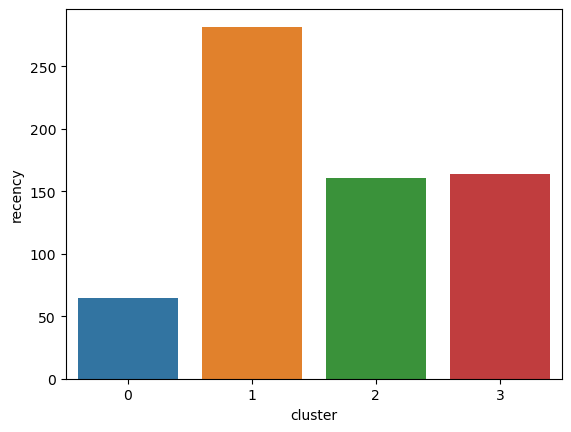

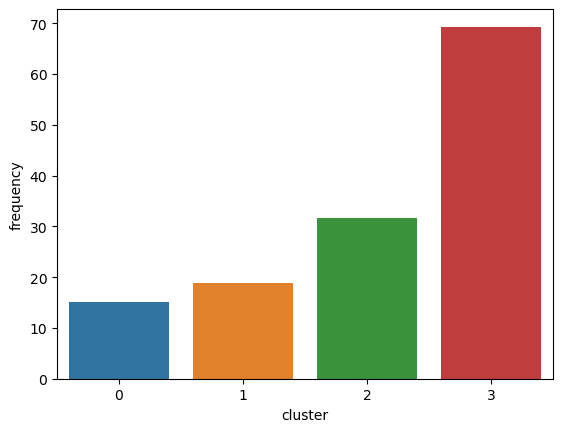

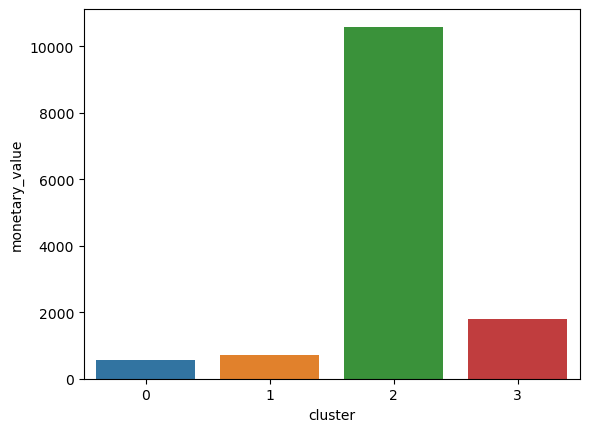

In [45]:
# visualize the data to identify the distinct traits of customers in each segment:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

: By looking at this graph, I am able to identify the attributes of customers in each segment.